## Steps for calculating land and sea area of tire image in percentage  

Load the Image  

Convert Color Spaces  

Define HSV Range for Blue  

Threshold for Blue Detection  

Extract Blue Lines  

Grayscale and Threshold Blue-Extracted Image  

Detect Contours  

Create Land Mask  

Create Sea Mask  

Calculate Land and Sea Areas  

Convert Areas to Percentages  

Display Processed Images  

Display Original Image  

Output Area Percentages

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the original image from the provided path
original_image_path = "C:\\Users\\DELL\\Desktop\\pawankumar\\WhatsApp Image 2023-12-31 at 16.44.05_d3e46164.jpg"
original_image = cv2.imread(original_image_path)
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

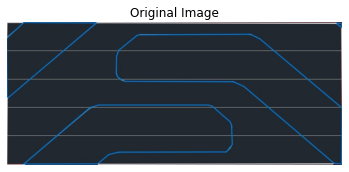

In [3]:
# Display the original image
plt.imshow(original_image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

In [4]:
# Convert to HSV for better color detection
hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

In [5]:
# Define range of blue color in HSV
lower_blue = np.array([100, 150, 50])
upper_blue = np.array([140, 255, 255])

In [6]:
# Threshold the HSV image to get only blue colors
blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

In [7]:
# Bitwise-AND mask and original image to extract blue lines
blue_extracted = cv2.bitwise_and(original_image, original_image, mask=blue_mask)

# Convert the blue-extracted image to grayscale and threshold it
gray_blue_extracted = cv2.cvtColor(blue_extracted, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray_blue_extracted, 1, 255, cv2.THRESH_BINARY)

# Find contours on the thresholded image of blue lines
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask for the contours to determine the land area
land_mask = np.zeros_like(gray_blue_extracted)
cv2.drawContours(land_mask, contours, -1, color=255, thickness=cv2.FILLED)

# Invert land_mask to get the sea mask, where non-land and non-boundary areas are filled
sea_mask = cv2.bitwise_not(land_mask)

In [8]:
# Function to calculate the area of land and sea for each rectangle
def calculate_land_sea_areas(land_mask, sea_mask, height):
    rectangle_height = height // 5
    land_sea_areas = []

    for i in range(5):
        # Define the bounds of the rectangle
        top = i * rectangle_height
        bottom = (i + 1) * rectangle_height if i < 4 else height

        # Calculate land area by summing up white pixels in the land mask
        land_area = np.sum(land_mask[top:bottom] == 255)
        # Calculate sea area by summing up white pixels in the sea mask
        sea_area = np.sum(sea_mask[top:bottom] == 255)

        land_sea_areas.append((land_area, sea_area))

    return land_sea_areas

In [9]:
# Calculate the area of land and sea within each rectangle
height = original_image.shape[0]
areas = calculate_land_sea_areas(land_mask, sea_mask, height)

In [10]:
# Function to calculate the percentage of land and sea
def calculate_area_percentages(areas):
    percentages = []
    for land_area, sea_area in areas:
        total_area = land_area + sea_area
        land_percentage = (land_area / total_area) * 100
        sea_percentage = (sea_area / total_area) * 100
        percentages.append((land_percentage, sea_percentage))
    return percentages

In [11]:
# Calculate the percentages
area_percentages = calculate_area_percentages(areas)

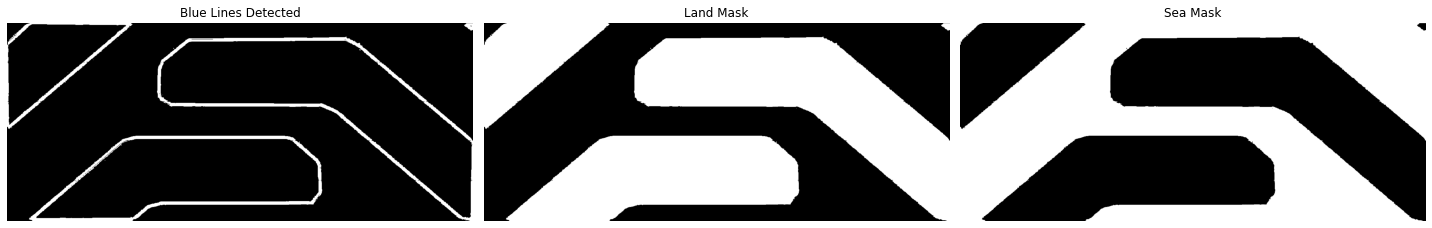

In [12]:
# Display the blue lines detected

fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
axes[0].set_title('Blue Lines Detected')
axes[0].axis('off')

# Display the land masks

axes[1].imshow(cv2.cvtColor(land_mask, cv2.COLOR_GRAY2RGB))
axes[1].set_title('Land Mask')
axes[1].axis('off')

# Display the sea masks

axes[2].imshow(cv2.cvtColor(sea_mask, cv2.COLOR_GRAY2RGB))
axes[2].set_title('Sea Mask')
axes[2].axis('off')

plt.tight_layout()
plt.show()

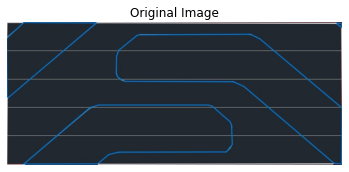

Rectangle A: Land area is 46.25% and sea area is 53.75%.
Rectangle B: Land area is 65.33% and sea area is 34.67%.
Rectangle C: Land area is 34.82% and sea area is 65.18%.
Rectangle D: Land area is 64.18% and sea area is 35.82%.
Rectangle E: Land area is 50.25% and sea area is 49.75%.


In [13]:
# Display the original image
plt.imshow(original_image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Output the calculated percentages of land and sea
rectangle_names = ['A', 'B', 'C', 'D', 'E']
for i, (land_percentage, sea_percentage) in enumerate(area_percentages):
    print(f"Rectangle {rectangle_names[i]}: Land area is {land_percentage:.2f}% and sea area is {sea_percentage:.2f}%.")

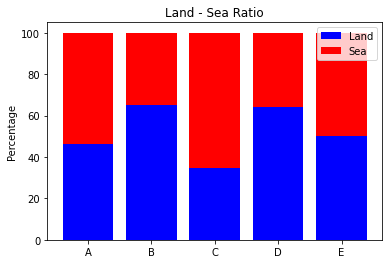

In [14]:
land_percentages = [land for land, sea in area_percentages]
sea_percentages = [sea for land, sea in area_percentages]

rectangles = ['A', 'B', 'C', 'D', 'E']
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(rectangles, land_percentages, label='Land', color='blue')
ax.bar(rectangles, sea_percentages, bottom=land_percentages, label='Sea', color='red')


ax.set_ylabel('Percentage')
ax.set_title('Land - Sea Ratio')
ax.set_xticks(range(len(rectangles)))
ax.set_xticklabels(rectangles)
ax.legend()
plt.show()

#### Note: Rectangle A is lower rectangle, Rectangle E is upper rectangle


##### precautions to take when uploading new images for processing:

Image Format: Use a supported format like JPEG or PNG.  

Resolution: Prefer high-resolution images for accuracy.  

Color Consistency: Ensure consistent colors for important features (like blue lines).    

Boundary Definition: Ensure clear and continuous boundaries.  

Background: Use a uniform and contrasting background.  

Scale and Orientation: Keep consistent scale and orientation across images.